In [0]:
import os
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
from sklearn.cluster import MiniBatchKMeans, KMeans
import pandas as pd

In [0]:
#downsample data by taking every 16th data row
n = 16
num_lines = sum(1 for l in open('full-game'))
skip_idx = [x for x in range(0, num_lines) if x % n != 0 or x > 20656700]

In [0]:
data_1 = pd.read_csv('full-game', skiprows=skip_idx, usecols = range(5), header = None, names = ['SID', 'ts','x', 'y', 'z'])

In [0]:
print(data_1.shape)

(1291044, 5)


In [0]:
#one sensor team
team_a = [14,16,88,52,54,24,58,28]
team_b = [100,64,66,68,38,40,74,44]
ball = [4,8,10]

In [0]:
#filter data by taking only 1 sensor per player(rather than 2)

row = [14,16,88,52,54,24,58,28,100,64,66,68,38,40,74,44,4,8,10]
data = pd.DataFrame(data_1.loc[data_1['SID'].isin(row)])

In [0]:
data = data.reset_index()
del data['index']

In [0]:
data

,SID,ts,x,y,z
0,40,10634764572720448,27228,-481,1514
1,64,10634776451835563,28529,-1466,-241
2,64,10634786243777526,28530,-1467,-236
3,14,10634795141594221,26227,-5728,-443
4,40,10634797780866227,27224,-483,1533
...,...,...,...,...,...
886821,14,12257168872565781,26546,-25895,-372
886822,10,12257170202719574,-7625,37096,-398
886823,10,12257172842703605,-7625,37099,-406
886824,64,12257174224274384,27676,28347,97


In [0]:
#pick only 1st 30 minutes data
data[data['ts'] < 1.242*10000000000000000]

,SID,ts,x,y,z
0,98,10629342490369879,26406,-6869,1070
1,67,10634736654612317,26679,-580,192
2,47,10634751877941530,27488,-5847,154
3,65,10634758356661915,28258,-892,446
4,40,10634764572720448,27228,-481,1514
...,...,...,...,...,...
1351726,65,12419979313742531,36284,8248,-218
1351727,57,12419983897140077,36538,7389,-283
1351728,69,12419988590167392,15886,6721,-216
1351729,59,12419993051096772,24801,9067,-267


(161196, 5)


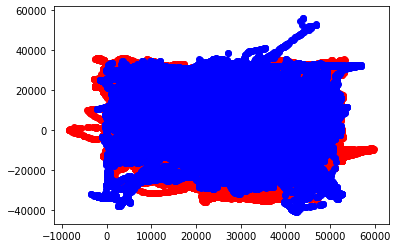

In [0]:
#visualize team movements over 30 mins
data_playersA = data.copy()
data_playersB = data.copy()
data_playersA.query('SID in [98,47,16,88,52,54,24,58,28]', inplace = True) 
data_playersB.query('SID in [100,63,64,66,68,38,40,74,44]', inplace = True) 
print(data_playersB.shape)
import matplotlib.pyplot as plt
plt.axes()
plt.scatter(data_playersA['x'],data_playersA['y'], c = 'r')
plt.scatter(data_playersB['x'],data_playersB['y'], c= 'b') 
plt.show()

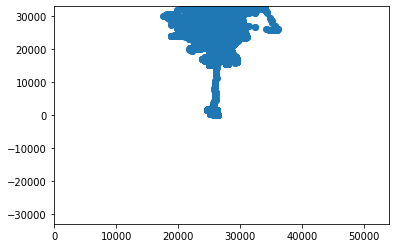

In [0]:
# position of goalkeeper of team B
import matplotlib.pyplot as plt
import numpy as np
x = data_keeper['x'].values
y = data_keeper['y'].values
plt.axes(xlim=(-50, 54000), ylim=(-33000,33000))
plt.scatter(x,y)
plt.plot()
plt.show()

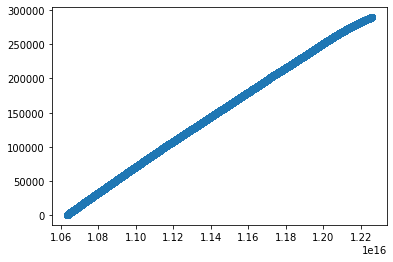

In [0]:
#linear increase in ts wrt index
import matplotlib.pyplot as plt
import numpy as np
x = data['ts'].values
y = data.index
plt.scatter(x,y)
plt.plot()
plt.show()

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [0]:
data_keeper

,SID,ts,x,y,z
28,88,10634832953218447,27829,-4293,-279
82,88,10634908717411987,27825,-4295,-261
131,88,10634969328767449,27828,-4302,-196
468,88,10635383506359739,27857,-4309,-103
497,88,10635418862983481,27853,-4309,-114
...,...,...,...,...,...
3097965,88,14893336409968008,23094,614,227
3098032,88,14893407123193581,23088,615,220
3098094,88,14893472785474558,23087,617,196
3098176,88,14893558651533933,23085,620,159


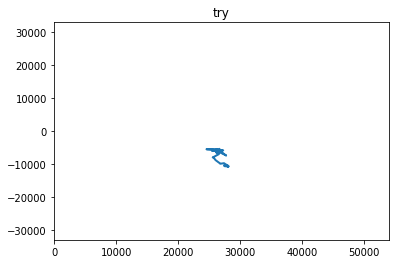

In [0]:
#animate player movement
fig = plt.figure()
ax = plt.axes(xlim=(-50, 54000), ylim=(-33000,33000))
line, = ax.plot([],[], lw=2)
def init(): 
	# creating an empty plot/frame 
	line.set_data([], []) 
	return line, 
xdata, ydata = [], [] 
def animate(i):
  x = data_keeper['x'].values[i]
  y = data_keeper['y'].values[i]
  xdata.append(x)
  ydata.append(y)
  line.set_data(xdata, ydata)
  return line, 
plt.title('try') 
#plt.axis('off') 

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init, 
							frames=500, interval=200, blit=True) 

# save the animation as mp4 video file 
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
anim.save('coil.mp4',writer=writer)

Feature collection:

In [0]:
#normalize x and y coordinates
data['x'] = data['x']/52539
data['y'] = data['y']/67925

In [0]:
data

,SID,ts,x,y,z
0,40,10634764572720448,0.518244,-0.007081,1514
1,64,10634776451835563,0.543006,-0.021583,-241
2,64,10634786243777526,0.543025,-0.021597,-236
3,14,10634795141594221,0.499191,-0.084328,-443
4,40,10634797780866227,0.518167,-0.007111,1533
...,...,...,...,...,...
886821,14,12257168872565781,0.505263,-0.381229,-372
886822,10,12257170202719574,-0.145130,0.546132,-398
886823,10,12257172842703605,-0.145130,0.546176,-406
886824,64,12257174224274384,0.526771,0.417328,97


In [0]:
# get position of the ball for each player (0 to current ball position = ball positions for players in that range)
# i.e. every time ball sensor sends data, set all players seen above it with that ball position to calculate their distance from the ball
import math
def ball_position():
  ball_pos_x = []
  ball_pos_y = []
  prev_ind = 0
  for i in range(len(data)):
    #print (data.loc[i,'SID'])
    if data.loc[i,'SID'] in ball:
      ball_pos_x[prev_ind:i+1] = [data.loc[i,'x']]*(i+1-prev_ind)
      ball_pos_y[prev_ind:i+1] = [data.loc[i,'y']]*(i+1-prev_ind)
      prev_ind = i+1
  return ball_pos_x, ball_pos_y

In [0]:
ball_pos_x, ball_pos_y = ball_position()

In [0]:
# calculate distance from the ball for every player
print(len(ball_pos_x))
print(len(ball_pos_y))
print(len(data))
distances = []
for i in range(len(data)):
  dist = math.sqrt(((data.loc[i,'x'] - ball_pos_x[i])**2) + ((data.loc[i,'y'] - ball_pos_y[i])**2))
  distances.append(dist)

data['dist_from_ball'] = distances

886826
886826
886826


In [0]:
# calculate distance from home and distance from enemy bases ((0.5,0.5), (0.5,-0.5))
import math
def dist_from_home():
  dist_from_home = []
  for i in range(len(data)):
    if data.loc[i,'SID'] in team_a:
      dist = math.sqrt(((data.loc[i,'x'] - 0.5)**2) + ((data.loc[i,'y'] - 0.5)**2))
    if data.loc[i,'SID'] in team_b:
      dist = math.sqrt((data.loc[i,'x'] - 0.5)**2 + (data.loc[i,'y'] + 0.5)**2)
    dist_from_home.append(dist)
  return dist_from_home

def dist_from_enemy():
  dist_from_enemy = []
  for i in range(len(data)):
    if data.loc[i,'SID'] in team_a:
      dist = math.sqrt(((data.loc[i,'x'] - 0.5)**2) + ((data.loc[i,'y'] + 0.5)**2))
    if data.loc[i,'SID'] in team_b:
      dist = math.sqrt((data.loc[i,'x'] - 0.5)**2 + (data.loc[i,'y'] - 0.5)**2)
    dist_from_enemy.append(dist)
  return dist_from_enemy

In [0]:
data['dist_from_home'] = dist_from_home()
data['dist_from_enemy'] = dist_from_enemy()

In [0]:
data

,SID,ts,x,y,z,dist_from_ball,dist_from_home,dist_from_enemy
0,40,10634764572720448,0.518244,-0.007081,1514,0.660489,0.493256,0.507409
1,64,10634776451835563,0.543006,-0.021583,-241,0.688851,0.480346,0.523353
2,64,10634786243777526,0.543025,-0.021597,-236,0.688874,0.480333,0.523369
3,14,10634795141594221,0.499191,-0.084328,-443,0.675562,0.584329,0.415672
4,40,10634797780866227,0.518167,-0.007111,1533,0.660429,0.493224,0.507436
...,...,...,...,...,...,...,...,...
886821,14,12257168872565781,0.505263,-0.381229,-372,1.132700,0.881245,0.118887
886822,10,12257170202719574,-0.145130,0.546132,-398,0.000000,0.881245,0.118887
886823,10,12257172842703605,-0.145130,0.546176,-406,0.000000,0.881245,0.118887
886824,64,12257174224274384,0.526771,0.417328,97,1.150367,0.917718,0.086898


In [0]:
# remove ball data
row = [14,16,88,52,54,24,58,28,100,64,66,68,38,40,74,44]
data = data.loc[data['SID'].isin(row)]
data = data.reset_index()
del data['index']

In [0]:
data

,SID,ts,x,y,z,dist_from_ball,dist_from_home,dist_from_enemy
0,40,10634764572720448,0.518244,-0.007081,1514,0.660489,0.493256,0.507409
1,64,10634776451835563,0.543006,-0.021583,-241,0.688851,0.480346,0.523353
2,64,10634786243777526,0.543025,-0.021597,-236,0.688874,0.480333,0.523369
3,14,10634795141594221,0.499191,-0.084328,-443,0.675562,0.584329,0.415672
4,40,10634797780866227,0.518167,-0.007111,1533,0.660429,0.493224,0.507436
...,...,...,...,...,...,...,...,...
289699,74,12257142834870984,0.454443,-0.012661,125,0.819568,0.489464,0.514681
289700,54,12257145762103809,0.337445,-0.145970,505,0.608882,0.666109,0.389566
289701,64,12257149744436316,0.526428,0.417446,127,0.415976,0.917826,0.086681
289702,14,12257168872565781,0.505263,-0.381229,-372,1.132700,0.881245,0.118887


In [0]:
data.groupby('SID').agg('count')

,ts,x,y,z,dist_from_ball,dist_from_home,dist_from_enemy
SID,,,,,,,
14,20925,20925,20925,20925,20925,20925,20925
16,18678,18678,18678,18678,18678,18678,18678
24,20290,20290,20290,20290,20290,20290,20290
28,17323,17323,17323,17323,17323,17323,17323
38,17646,17646,17646,17646,17646,17646,17646
40,17898,17898,17898,17898,17898,17898,17898
44,16034,16034,16034,16034,16034,16034,16034
52,17125,17125,17125,17125,17125,17125,17125
54,20736,20736,20736,20736,20736,20736,20736


In [0]:
# function to get count of nearest neighbours
import numpy as np
import math
def get_count(pos,i):
  this = np.asarray([data.loc[i,'x'],data.loc[i,'y']])
  distances = []
  distances = np.array([np.linalg.norm(this-other) for other in pos])
  #print(distances)
  distances = np.array(distances)
  number_neighbors = (distances <= 0.35).sum()
  #number_neighbors = np.count_nonzero(np.where(distances <= 0.117))
  return number_neighbors

In [0]:
#for all players within time limit 0.2 seconds, collect all player data and count number of players within 10meters
count_team = []
for i in range(len(data)):
  count  = 0
  time = data.loc[i,'ts']
  posi = []
  visited = set()
  for j in range(i+1,len(data)):
    if data.loc[j,'ts']-time < 200000000000:
      pos = []
      #see only own team players + dont see yourself + dont see players which are already seen-- if i is in team A
      if data.loc[i,'SID'] in team_a and data.loc[j, 'SID'] in team_a and data.loc[j, 'SID'] != data.loc[i,'SID'] and data.loc[j, 'SID'] not in visited: 
        pos = [data.loc[j,'x'],data.loc[j,'y']]
        posi.append(np.asarray(pos))
        visited.add(data.loc[j, 'SID'])
      #if i is in team B
      elif data.loc[i,'SID'] in team_b and data.loc[j, 'SID'] in team_b and data.loc[j, 'SID'] != data.loc[i,'SID'] and data.loc[j, 'SID'] not in visited:
        pos = [data.loc[j,'x'],data.loc[j,'y']]
        posi.append(np.asarray(pos))
        visited.add(data.loc[j, 'SID'])
    else:
      break
  if(len(posi) == 0):
    count = 0
  else:
    count = get_count(posi,i)
    #print("i","count",i,count)
  count_team.append(count)

In [0]:
#pickle data into file
import pickle
infile = open('count_players','wb')
pickle.dump(count_team,infile)
infile.close()

In [0]:
#read pickled file
import pickle
infile = open('count_players','rb')
count_team = pickle.load(infile)
infile.close()

In [0]:
data['allies_nearby'] = count_team

In [0]:
#normalize number of neighbouring players
data['allies_nearby'] = data['allies_nearby']/8

In [0]:
# similarly for enemies_nearby
count_opp = []
for i in range(len(data)):
  count  = 0
  time = data.loc[i,'ts']
  posi = []
  visited = set()
  for j in range(i+1,len(data)):
    if data.loc[j,'ts']-time < 200000000000:
      pos = []
      #see only own team players + dont see yourself + dont see players which are already seen-- if i is in team A
      if data.loc[i,'SID'] in team_a and data.loc[j, 'SID'] in team_b and data.loc[j, 'SID'] not in visited: 
        pos = [data.loc[j,'x'],data.loc[j,'y']]
        posi.append(np.asarray(pos))
        visited.add(data.loc[j, 'SID'])
      #if i is in team B
      elif data.loc[i,'SID'] in team_b and data.loc[j, 'SID'] in team_a and data.loc[j, 'SID'] not in visited:
        pos = [data.loc[j,'x'],data.loc[j,'y']]
        posi.append(np.asarray(pos))
        visited.add(data.loc[j, 'SID'])
    else:
      break
  if(len(posi) == 0):
    count = 0
  else:
    count = get_count(posi,i)
    #print("i","count",i,count)
  count_opp.append(count)

In [0]:
# normalize number of neighbouring players
data['enemies_nearby'] = count_opp
data['enemies_nearby'] = data['enemies_nearby']/8

In [0]:
import pickle
infile = open('data_features','wb')
pickle.dump(data,infile)
infile.close()

In [0]:
#run cell to load data features
import pickle
infile = open('data_features','rb')
data = pickle.load(infile)
infile.close()

In [5]:
data

,SID,ts,x,y,z,dist_from_ball,dist_from_home,dist_from_enemy,allies_nearby,enemies_nearby
0,40,10634764572720448,0.518244,-0.007081,1514,0.660489,0.493256,0.507409,0.750,0.875
1,64,10634776451835563,0.543006,-0.021583,-241,0.688851,0.480346,0.523353,0.750,0.875
2,64,10634786243777526,0.543025,-0.021597,-236,0.688874,0.480333,0.523369,0.750,0.875
3,14,10634795141594221,0.499191,-0.084328,-443,0.675562,0.584329,0.415672,0.750,0.875
4,40,10634797780866227,0.518167,-0.007111,1533,0.660429,0.493224,0.507436,0.750,0.750
...,...,...,...,...,...,...,...,...,...,...
289699,74,12257142834870984,0.454443,-0.012661,125,0.819568,0.489464,0.514681,0.000,0.125
289700,54,12257145762103809,0.337445,-0.145970,505,0.608882,0.666109,0.389566,0.125,0.000
289701,64,12257149744436316,0.526428,0.417446,127,0.415976,0.917826,0.086681,0.000,0.000
289702,14,12257168872565781,0.505263,-0.381229,-372,1.132700,0.881245,0.118887,0.000,0.000


In [0]:
#currently we have data every 0.01 secs --> take every 10th row from here (0.01 x 10)
data_features = data.iloc[::10,:]
data_features = data_features.reset_index()
del data_features['index']

In [0]:
data_features = data_features[['SID','ts','dist_from_ball','dist_from_home','dist_from_enemy','allies_nearby','enemies_nearby']]

In [8]:
data_features

,SID,ts,dist_from_ball,dist_from_home,dist_from_enemy,allies_nearby,enemies_nearby
0,40,10634764572720448,0.660489,0.493256,0.507409,0.750,0.875
1,64,10634835203489517,0.688908,0.480291,0.523414,0.750,0.875
2,40,10634892661283797,0.660364,0.493206,0.507447,0.625,0.875
3,66,10634948640910929,0.671218,0.492672,0.509044,0.750,1.000
4,24,10634982172877346,0.042126,0.579634,0.420440,0.750,0.875
...,...,...,...,...,...,...,...
28966,24,12256807364913137,0.894558,0.607447,0.394847,0.250,0.625
28967,40,12256891904673596,0.220811,0.716366,0.318252,0.625,0.000
28968,68,12257021450938581,0.767137,0.573212,0.430392,0.625,0.250
28969,68,12257095295449429,0.068734,0.572880,0.430634,0.375,0.250


In [0]:
#for each row in data features, find same SID within 1-8 seconds and stack them together. Do this for each player. n x ts x 5
make_stacked_tensors = []
visited = []
for sid in range(len(data_features)):
  if sid not in visited:
    visited.append(sid)
    stack_frames = []
    stack_frames.append(data_features.loc[sid,['dist_from_ball', 'dist_from_home','dist_from_enemy','allies_nearby','enemies_nearby']])
    i = 0
    for j in range(sid+1, len(data_features)):
      if i <= 10:
        if data_features.loc[sid,'SID'] == data_features.loc[j,'SID'] and j not in visited:
            stack_frames.append(data_features.loc[j,['dist_from_ball', 'dist_from_home','dist_from_enemy','allies_nearby','enemies_nearby']])
            visited.append(j)
            i+=1
      else:
        break
  else:
    continue
  make_stacked_tensors.append(torch.tensor(stack_frames))


In [0]:
make_stacked_tensors = [t for t in make_stacked_tensors if t.size() == torch.Size([12,5])]

In [24]:
len(n)

2407

In [0]:
train_tensor = make_stacked_tensors

In [0]:
use_cuda = torch.cuda.is_available()

In [0]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(
                 dataset=train_tensor,
                 batch_size=batch_size,
                 shuffle=True)

In [0]:
class DEC_AE(nn.Module):
    def __init__(self, num_classes, num_features):
        super(DEC_AE,self).__init__()
        self.dropout = nn.Dropout(p=0.1)
        self.fc1 = nn.Linear(12*5,20)
        self.fc2 = nn.Linear(20,8)
        #self.fc3 = nn.Linear(14,4)
        #self.fc4 = nn.Linear(4,num_features)
        self.relu = nn.ReLU()
        self.fc_d1 = nn.Linear(20,12*5)
        self.fc_d2 = nn.Linear(8,20)
        #self.fc_d3 = nn.Linear(4,14)
        #self.fc_d4 = nn.Linear(num_features,4)
        #self.alpha = 1.0
        #self.clusterCenter = nn.Parameter(torch.zeros(num_classes,num_features))
        self.pretrainMode = True
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                torch.nn.init.xavier_uniform(m.weight)

    def setPretrain(self,mode):
        """To know if it should run only the Encoder or Encoder+Decoder"""
        self.pretrainMode = mode
        
    def forward(self,x):
        x = x.view(-1, 12*5)
        x.float()
        x = self.dropout(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        #x = self.fc3(x)
        #x = self.relu(x)
        #x = self.fc4(x)
        x_ae = x
        #if not in pretrain mode, we only need encoder
        if self.pretrainMode == False:
            return x, self.getTDistribution(x,self.clusterCenter)
        ##### encoder is done, followed by decoder to backprop MSE#####
        #x = self.fc_d4(x)
        #x = self.relu(x)
        #x = self.fc_d3(x)
        #x = self.relu(x)
        x = self.fc_d2(x)
        x = self.relu(x)
        x = self.fc_d1(x)
        x_de = x.view(-1,12,5)
        return x_ae, x_de

In [0]:
  class DEC:
    def __init__(self,n_clusters,alpha=1.0):
        self.n_clusters=n_clusters
        self.alpha = alpha
    def pretrain(self,train_loader, epochs):
        dec_ae = DEC_AE(10,10).cuda() #auto encoder
        mseloss = nn.MSELoss()
        optimizer = optim.Adam(dec_ae.parameters(),lr = 0.001)
        best_acc = 0.0
        for epoch in range(epochs):
            dec_ae.train()
            running_loss=0.0
            for i,data in enumerate(train_loader):
                x = data
                x = Variable(x).cuda()
                x = x.float()
                optimizer.zero_grad()
                x_ae,x_de = dec_ae(x)
                loss = F.mse_loss(x_de,x,reduce=True)
                loss.backward()
                optimizer.step()
                #x_eval = x.data.cpu().numpy()
                #label_eval = label.data.cpu().numpy()
                running_loss += loss.data.cpu().numpy()
                #print (running_loss/100)
                if i % 100 == 0:   
                    print('[%d, %5d] loss: %.7f' % (epoch + 1, i + 1, running_loss / 100))
                    running_loss = 0.0

In [31]:
import random
random.seed(7)
dec = DEC(2)
dec.pretrain(train_loader, 64)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


[1,     1] loss: 0.0042539
[2,     1] loss: 0.0019859
[3,     1] loss: 0.0007625
[4,     1] loss: 0.0004947
[5,     1] loss: 0.0004764
[6,     1] loss: 0.0003714
[7,     1] loss: 0.0003447
[8,     1] loss: 0.0003221
[9,     1] loss: 0.0003416
[10,     1] loss: 0.0002967
[11,     1] loss: 0.0003170
[12,     1] loss: 0.0003001
[13,     1] loss: 0.0003040
[14,     1] loss: 0.0002903
[15,     1] loss: 0.0002921
[16,     1] loss: 0.0002872
[17,     1] loss: 0.0002322
[18,     1] loss: 0.0002448
[19,     1] loss: 0.0002566
[20,     1] loss: 0.0002278
[21,     1] loss: 0.0002362
[22,     1] loss: 0.0002255
[23,     1] loss: 0.0002527
[24,     1] loss: 0.0002519
[25,     1] loss: 0.0002393
[26,     1] loss: 0.0002431
[27,     1] loss: 0.0002031
[28,     1] loss: 0.0002359
[29,     1] loss: 0.0002396
[30,     1] loss: 0.0002403
[31,     1] loss: 0.0002254
[32,     1] loss: 0.0002260
[33,     1] loss: 0.0002314
[34,     1] loss: 0.0002339
[35,     1] loss: 0.0002233
[36,     1] loss: 0.0002250
[